# Spatial Autocorrelation: General Health (Fair or Poor Health)

**`GHLTH_AdjP`** - Model-based estimate for age-adjusted prevalence of **fair or poor health** among adults aged >=18 years / Percentage of adults reporting **fair or poor health** (age-adjusted)

In [1]:
pip install pysal==2.0.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install esda

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install splot   #this might take some time the first time

  Using cached https://files.pythonhosted.org/packages/94/c7/bc840c32ee973c4609465c1d8722f3e433653edf6aab65ba341cd59fcf34/splot-1.1.7-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/51/a2/0fbdec8bc6e5dbafe5c775c069403b8cf4a26d650e7b1c256148cbf7ec6a/giddy-2.3.4-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/0c/33/07044ad6529c01ce4fac032d2124d2815ead529fb95eb6616aed8c0a57c1/quantecon-0.10.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/14/27/1468111538f33bd9fb13c0b2c1534c7a487cec8fadf14e318d73be18e4e1/llvmlite-0.39.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/ff/94/64287b38c7de4c90683630338cf28f129decbba0a44f0c6db35a873c73c4/importlib_metadata-6.7.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5b/fa/c9e82bbe1af6266adf08afb563905eb87cab83fde00a0a08963510621047/zipp-3.15.0-py3-none-any.whl
  ERROR: Command errored out with exit status 1:
   command: /opt/conda/bin/python

Failed to build llvmlite
ERROR: numba 0.56.4 has requirement numpy<1.24,>=1.18, but you'll have numpy 1.17.3 which is incompatible.
  Found existing installation: llvmlite 0.27.1
ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install -U plotly

Requirement already up-to-date: plotly in /opt/conda/lib/python3.7/site-packages (5.18.0)
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Graphics
import matplotlib.pyplot as plt
import seaborn as sbn
from pysal.viz import splot
#from splot.esda import plot_moran

# Analysis
import geopandas as gpd  # Spatial data manipulation
import pandas as pd
import numpy as np
from pysal.explore import esda
from pysal.lib import weights
from numpy.random import seed

In [6]:
%matplotlib inline
import plotly.graph_objects as go
import plotly.figure_factory as ff
#https://plotly.com/python/builtin-colorscales/

from matplotlib import colors

### Load all data with geospatial (geometry) component included

In [7]:
df = gpd.read_file('fipsmerge_geo.shp')

pd.set_option("max_columns", None)
pd.set_option("max_rows", None)

df.head(2)

,FIPS,STATE_NAME,COUNTY,STATE_ABBR,ACCESS2_Ad,ARTHRITIS_,BINGE_AdjP,BPHIGH_Adj,BPMED_AdjP,CANCER_Adj,CASTHMA_Ad,CERVICAL_A,CHD_AdjPre,CHECKUP_Ad,CHOLSCREEN,COLON_SCRE,COPD_AdjPr,COREM_AdjP,COREW_AdjP,CSMOKING_A,DENTAL_Adj,DEPRESSION,DIABETES_A,GHLTH_AdjP,HIGHCHOL_A,KIDNEY_Adj,LPA_AdjPre,MAMMOUSE_A,MHLTH_AdjP,OBESITY_Ad,PHLTH_AdjP,SLEEP_AdjP,STROKE_Adj,TEETHLOST_,HEARING_Ad,VISION_Adj,COGNITION_,MOBILITY_A,SELFCARE_A,INDEPLIVE_,DISABILITY,COUNTY_NAM,SchoolSegr,ChildcareC,Dentists,HighSchool,SomeColleg,Unemployme,ChildrenIn,IncomeIneq,ChildrenSi,AirPolluti,DrinkingWa,DrivingAlo,LongCommut,Disconnect,GenderPayG,MedianHHIn,ChildrenFr,Residentia,Homeowners,SevereHous,BroadbandA,Population,AgeBelow18,Age65Older,Black,AmericanIn,Asian,NativeHawa,Hispanic,White,NotProfici,Female,PrematureD,PoorFairHe,PoorPhysic,PoorMental,LowBirthwe,AdultSmoki,AdultObesi,FoodEnviro,PhysicalIn,AccesstoEx,ExcessiveD,AlcoholImp,STI,TeenBirths,Uninsured,PrimaryCar,Preventabl,Mammograph,FluVaccina,SocialAsso,InjuryDeat,AirPollu_1,HHighHousi,HHwOvercro,HHwLackKit,LifeExpect,PrematureA,ChildMorta,InfantMort,FrequentPh,DiabetesPr,HIVPrevale,FoodInsecu,DrugOverdo,UninsuredA,UninsuredC,HighScho_1,ChildrenEl,Resident_1,ChildCar_1,Homicides,Suicides,FirearmFat,MotorVehic,JuvenileAr,FormalJuve,InformalJu,Rural,AIRQUALTY_,geometry
0,01001,Alabama,Autauga,AL,10.4,28.2,15.5,37.2,65.3,6.3,10.2,84.3,5.7,76.0,85.1,71.5,6.8,44.0,41.3,16.9,62.9,22.7,10.7,17.3,32.1,2.9,29.1,74.8,18.0,38.9,11.7,37.5,3.0,12.7,6.0,4.7,14.3,14.7,3.7,8.2,30.2,Autauga County,0.055262,0.175268,0.000322,0.895845,0.596126,0.028169,0.161,4.79440,0.267662,10.0,0.0,0.864011,0.416,NaN,0.684511,66444,0.412507,32.707131,0.742451,0.127533,0.854639,59095,0.234064,0.160487,0.207310,0.004586,0.012031,0.001185,0.033268,0.724545,0.002312,0.513783,9407.948438,0.173,3.910265,5.703204,0.098713,0.169,0.389,6.7,0.291,0.544920,0.152378,0.290909,577.0,20.908880,0.100186,0.000440,3915.0,0.40,0.37,12.691429,68.033478,10.0,0.132084,0.016002,0.015770,75.263497,472.283923,58.562128,6.834686,0.117,0.107,218.0,0.133,9.350765,0.124074,0.040412,0.870000,0.279986,29.382404,5.726341,6.616163,17.457479,17.362711,18.067215,4.838710,24.0,6.0,0.406768,8.535348,"POLYGON ((-86.82067 32.34731, -86.81446 32.370..."
1,01003,Alabama,Baldwin,AL,9.5,26.4,17.8,32.7,62.8,6.3,9.9,85.3,5.5,72.6,85.2,71.5,6.5,55.8,40.8,15.0,65.5,23.2,9.8,15.2,31.9,2.7,27.6,75.4,17.3,37.2,11.0,35.1,2.7,9.9,6.0,4.0,13.3,13.2,3.1,7.2,29.1,Baldwin County,0.090175,0.171167,0.000476,0.910142,0.661050,0.029630,0.164,4.30071,0.186992,7.6,1.0,0.814019,0.376,0.078527,0.740877,65658,0.463740,38.482766,0.771212,0.109629,0.878564,239294,0.212183,0.214698,0.083679,0.008003,0.011225,0.000685,0.048417,0.831488,0.007597,0.513477,8981.575353,0.152,3.730943,5.373666,0.081243,0.150,0.372,7.5,0.276,0.631293,0.164226,0.361446,317.6,20.202237,0.109971,0.000627,2799.0,0.44,0.42,9.653397,77.507985,7.6,0.105648,0.015230,0.006366,76.738314,416.218912,54.035005,5.329250,0.110,0.098,174.3,0.118,25.729422,0.133762,0.049369,0.886517,0.369956,39.543961,6.231824,3.388203,18.790126,14.343432,15.833332,20.305677,343.0,122.0,0.375865,8.263533,"POLYGON ((-87.97309 31.16482, -87.93710 31.173..."


In [8]:
#checking for missing values including the 67 Florida counties
df['GHLTH_AdjP'].isna().sum()

67

In [9]:
# drop only rows that are missing data for general health
df = df.dropna(subset=['GHLTH_AdjP'])

In [10]:
df.head(2)

,FIPS,STATE_NAME,COUNTY,STATE_ABBR,ACCESS2_Ad,ARTHRITIS_,BINGE_AdjP,BPHIGH_Adj,BPMED_AdjP,CANCER_Adj,CASTHMA_Ad,CERVICAL_A,CHD_AdjPre,CHECKUP_Ad,CHOLSCREEN,COLON_SCRE,COPD_AdjPr,COREM_AdjP,COREW_AdjP,CSMOKING_A,DENTAL_Adj,DEPRESSION,DIABETES_A,GHLTH_AdjP,HIGHCHOL_A,KIDNEY_Adj,LPA_AdjPre,MAMMOUSE_A,MHLTH_AdjP,OBESITY_Ad,PHLTH_AdjP,SLEEP_AdjP,STROKE_Adj,TEETHLOST_,HEARING_Ad,VISION_Adj,COGNITION_,MOBILITY_A,SELFCARE_A,INDEPLIVE_,DISABILITY,COUNTY_NAM,SchoolSegr,ChildcareC,Dentists,HighSchool,SomeColleg,Unemployme,ChildrenIn,IncomeIneq,ChildrenSi,AirPolluti,DrinkingWa,DrivingAlo,LongCommut,Disconnect,GenderPayG,MedianHHIn,ChildrenFr,Residentia,Homeowners,SevereHous,BroadbandA,Population,AgeBelow18,Age65Older,Black,AmericanIn,Asian,NativeHawa,Hispanic,White,NotProfici,Female,PrematureD,PoorFairHe,PoorPhysic,PoorMental,LowBirthwe,AdultSmoki,AdultObesi,FoodEnviro,PhysicalIn,AccesstoEx,ExcessiveD,AlcoholImp,STI,TeenBirths,Uninsured,PrimaryCar,Preventabl,Mammograph,FluVaccina,SocialAsso,InjuryDeat,AirPollu_1,HHighHousi,HHwOvercro,HHwLackKit,LifeExpect,PrematureA,ChildMorta,InfantMort,FrequentPh,DiabetesPr,HIVPrevale,FoodInsecu,DrugOverdo,UninsuredA,UninsuredC,HighScho_1,ChildrenEl,Resident_1,ChildCar_1,Homicides,Suicides,FirearmFat,MotorVehic,JuvenileAr,FormalJuve,InformalJu,Rural,AIRQUALTY_,geometry
0,01001,Alabama,Autauga,AL,10.4,28.2,15.5,37.2,65.3,6.3,10.2,84.3,5.7,76.0,85.1,71.5,6.8,44.0,41.3,16.9,62.9,22.7,10.7,17.3,32.1,2.9,29.1,74.8,18.0,38.9,11.7,37.5,3.0,12.7,6.0,4.7,14.3,14.7,3.7,8.2,30.2,Autauga County,0.055262,0.175268,0.000322,0.895845,0.596126,0.028169,0.161,4.79440,0.267662,10.0,0.0,0.864011,0.416,NaN,0.684511,66444,0.412507,32.707131,0.742451,0.127533,0.854639,59095,0.234064,0.160487,0.207310,0.004586,0.012031,0.001185,0.033268,0.724545,0.002312,0.513783,9407.948438,0.173,3.910265,5.703204,0.098713,0.169,0.389,6.7,0.291,0.544920,0.152378,0.290909,577.0,20.908880,0.100186,0.000440,3915.0,0.40,0.37,12.691429,68.033478,10.0,0.132084,0.016002,0.015770,75.263497,472.283923,58.562128,6.834686,0.117,0.107,218.0,0.133,9.350765,0.124074,0.040412,0.870000,0.279986,29.382404,5.726341,6.616163,17.457479,17.362711,18.067215,4.838710,24.0,6.0,0.406768,8.535348,"POLYGON ((-86.82067 32.34731, -86.81446 32.370..."
1,01003,Alabama,Baldwin,AL,9.5,26.4,17.8,32.7,62.8,6.3,9.9,85.3,5.5,72.6,85.2,71.5,6.5,55.8,40.8,15.0,65.5,23.2,9.8,15.2,31.9,2.7,27.6,75.4,17.3,37.2,11.0,35.1,2.7,9.9,6.0,4.0,13.3,13.2,3.1,7.2,29.1,Baldwin County,0.090175,0.171167,0.000476,0.910142,0.661050,0.029630,0.164,4.30071,0.186992,7.6,1.0,0.814019,0.376,0.078527,0.740877,65658,0.463740,38.482766,0.771212,0.109629,0.878564,239294,0.212183,0.214698,0.083679,0.008003,0.011225,0.000685,0.048417,0.831488,0.007597,0.513477,8981.575353,0.152,3.730943,5.373666,0.081243,0.150,0.372,7.5,0.276,0.631293,0.164226,0.361446,317.6,20.202237,0.109971,0.000627,2799.0,0.44,0.42,9.653397,77.507985,7.6,0.105648,0.015230,0.006366,76.738314,416.218912,54.035005,5.329250,0.110,0.098,174.3,0.118,25.729422,0.133762,0.049369,0.886517,0.369956,39.543961,6.231824,3.388203,18.790126,14.343432,15.833332,20.305677,343.0,122.0,0.375865,8.263533,"POLYGON ((-87.97309 31.16482, -87.93710 31.173..."


### Create table for vaiable of interest: General Health

In [11]:
# Index table on variable of interest "General Health (Fair and Poor)"
db = df.set_index("GHLTH_AdjP", drop=False)
db.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
db2 = db.to_crs(epsg=3857)

Here I am choosing contiguity/adjacency spatial weight, specifically **Queen contiguity**. I think because the data are counties, that adjacency/contguity spatial weights works well for this polygon data. Although, it may not present much of a difference here, I am choosing Queen over Rook as to include as neighboors those polygons that only share one or more vertices.

In [13]:
# spaital weights
w = weights.contiguity.Queen.from_dataframe(db2)

#standardize matrix
w.transform = 'R'

#finding the log transform of the data to get the "y"
y = db2['GHLTH_AdjP']

('WARNING: ', 1119, ' is an island (no neighbors)')
('WARNING: ', 1125, ' is an island (no neighbors)')
('WARNING: ', 1769, ' is an island (no neighbors)')
('WARNING: ', 2879, ' is an island (no neighbors)')


/opt/conda/lib/python3.7/site-packages/pysal/lib/weights/weights.py:168: UserWarning: There are 4 disconnected observations 
  Island ids: 1119, 1125, 1769, 2879
  " Island ids: %s" % ', '.join(str(island) for island in self.islands))


In [14]:
# Finding the spatial lag and adding column ‘lag’
db2['lag'] = weights.lag_spatial(w,y)

Calculating a **global measure** of spatial autocorrelation - **Moran's I** 

In [15]:
#Moran's I and p-value
mi = esda.Moran(db2['lag'], w)
mi

In [16]:
mi.I

0.9041985590397461

In [17]:
mi.p_sim

0.001

In [18]:
# Let's take a look at the Moran's I plot. Remember to look at the 4 quarters.
# finishing changing the code to match current variables

db2['lag'] = weights.spatial_lag.lag_spatial(w, db2['GHLTH_AdjP'])

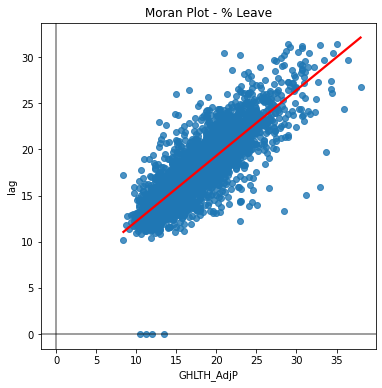

In [19]:
# moran_scatterplot(mi);
f, ax = plt.subplots(1, figsize=(6, 6))
sbn.regplot(
    x="GHLTH_AdjP",
    y="lag",
    ci=None,
    data=db2,
    line_kws={"color": "r"},
)
ax.axvline(0, c="k", alpha=0.5)
ax.axhline(0, c="k", alpha=0.5)
ax.set_title("Moran Plot - % Leave")
plt.show()

Looking more locally for spatial autocorrelation using the Local Indicator of Spatial Autocorrelation (**LISA**).

In [20]:
lisa = esda.Moran_Local(db2['lag'], w)

/opt/conda/lib/python3.7/site-packages/pysal/explore/esda/moran.py:895: RuntimeWarning: invalid value encountered in true_divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
/opt/conda/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1956: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0


Adding columns to our data for both significance and what quadrant the counties fell in.

In [21]:
# Break counties into significant or not
db2['significant'] = lisa.p_sim < 0.05
db2['significant'] = db2['significant'].astype('int').astype("str")


# Tag what quadrant they belong to
db2['quad'] = lisa.q

In [22]:
#reset index
db2.reset_index(drop=True, inplace=True)

In [23]:
# Pick only significant counties - assign '0' to non-significant

spots = []

for x in range(len(db2.significant)):
    for obs in db2['significant'][x]:
        if obs == "0":
            spots.append(0)
        if obs == '1':
            spots.append(db2['quad'][x])

db2['spots'] = spots

# check the unique values
db2.spots.unique()

array([1, 0, 3, 4, 2])

In [24]:
#Mapping from value to name (as a dict)
spots_labels = {
    0: "Non-Significant",
    1: "HH",
    2: "LH",
    3: "LL",
    4: "HL",
}

In [25]:
# Create column in `db` with labels for each polygon
db2["labels"] = pd.Series(
    # First initialise a Series using values and `db` index
    spots,
    index=db2.index
    # Then map each value to corresponding label based
    # on the `spots_labels` mapping
).map(spots_labels)
# Print top for inspection
db2["labels"].value_counts()

Non-Significant    1468
LL                  850
HH                  720
LH                    2
HL                    1
Name: labels, dtype: int64

In [26]:
#Getting Total USCountyMap for background

USCountyMap = df[['FIPS','STATE_NAME','geometry']]
USCountyMap = USCountyMap.to_crs({'init':'epsg:3857'})

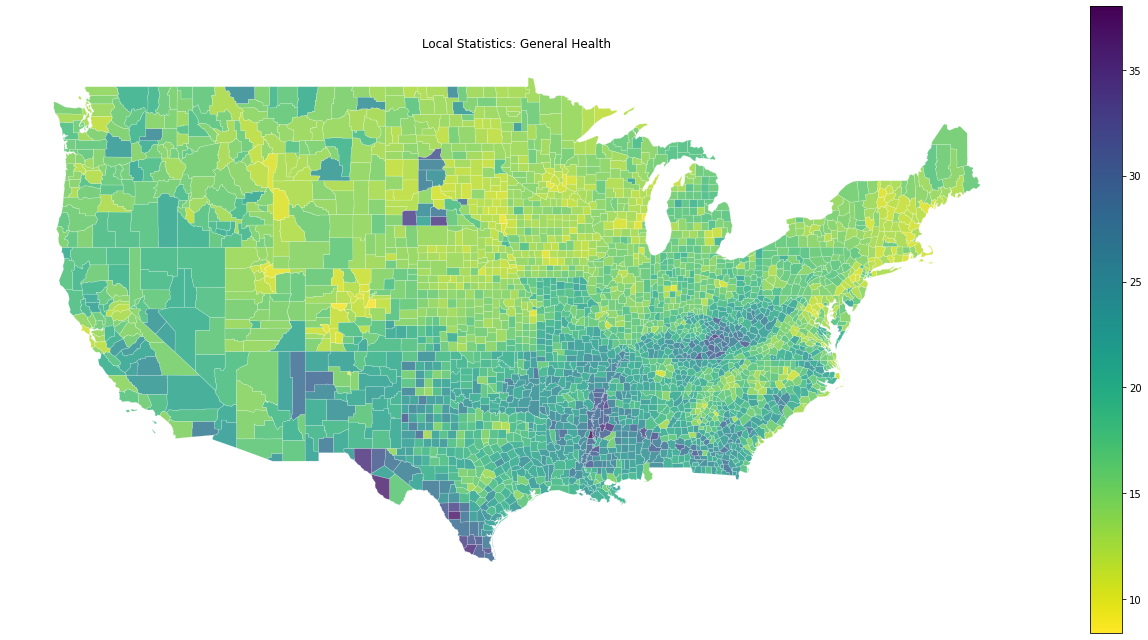

In [27]:
from matplotlib.colors import ListedColormap, BoundaryNorm

# Set up figure and axes
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
# Make the axes accessible with single indexing


# Subplot 1 #
# Choropleth of local statistics


# Plot gray county base
base = USCountyMap.plot(color='#EDECED', 
                      edgecolor='white',
ax=ax)

#Plot choropleth of local statistics
db2.plot(column='GHLTH_AdjP', 
         cmap= 'viridis_r',
         #norm = Normalize(vmin=1, vmax=13),
         edgecolor='white',
         linewidth=0.2,
         alpha=0.8,
         legend = True,
         legend_kwds={'format': '%.0f'},
ax=base

)

# Figure styling #
# Set title to each subplot
ax.set_axis_off()
ax.set_title('Local Statistics: General Health'
    )
# Tight layout to minimise in-betwee white space
f.tight_layout()

#Save figure
#plt.savefig("us_generalhealth")
    
# Display the figure
plt.show()

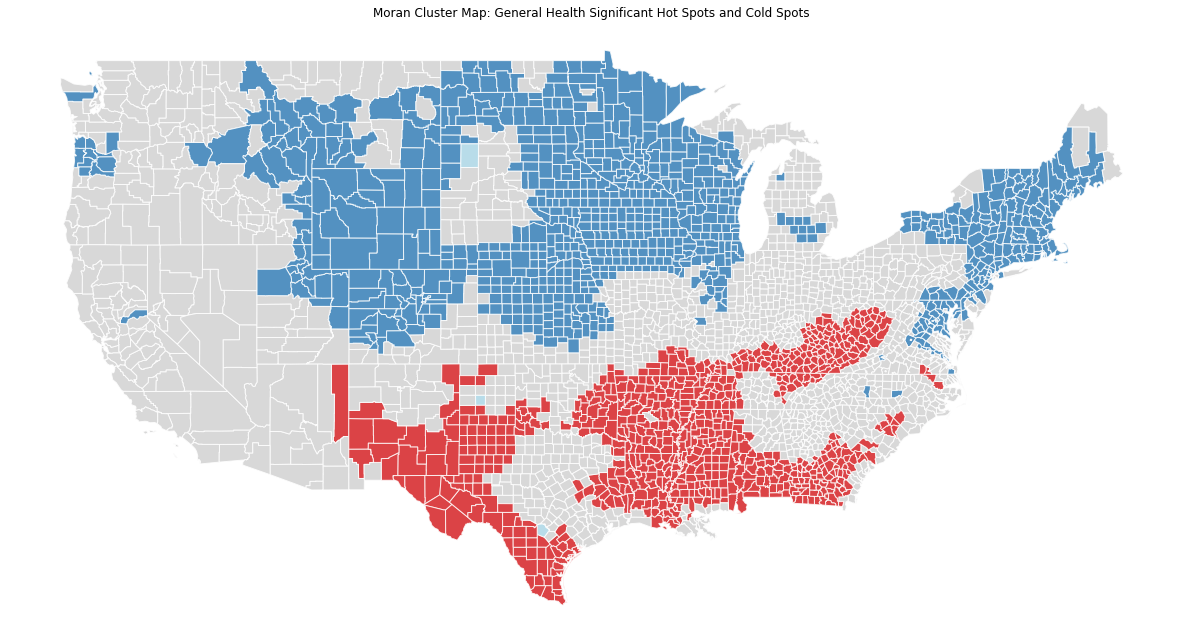

In [28]:
from matplotlib.colors import ListedColormap, BoundaryNorm

# Set up figure and axes
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
# Make the axes accessible with single indexing


# Subplot 2 #
# Quadrant categories

# Plot gray county base
base = USCountyMap.plot(color='#EDECED', 
                      edgecolor='white',
ax=ax)

# Plot Quandrant colors 
db2.plot(column='labels', 
         #cmap=ListedColormap(['#D7191C','#FDAE61', '#ABD9E9','#2C7BB6','#D3D3D3']), 
         cmap=ListedColormap(['#D7191C','#ABD9E9', '#ABD9E9','#2C7BB6','#D3D3D3']),
         edgecolor='white', 
         alpha=0.8,
         legend = True, 
ax=base
)

# Figure styling #
# Set title to each subplot
ax.set_axis_off()
ax.set_title(
    'Moran Cluster Map: General Health Significant Hot Spots and Cold Spots'
    )
ax.get_legend().remove()
# Tight layout to minimise in-betwee white space
f.tight_layout()

#Save figure
#plt.savefig("us_gh_hscs")
    
# Display the figure
plt.show()